In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from dateutil import parser

In [2]:
dataset = pd.read_csv('Customer/appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [6]:
data = dataset.copy().drop(columns=['user','first_open','enrolled_date','screen_list','enrolled'])

In [7]:
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


#### Histogram


<Figure size 432x288 with 0 Axes>

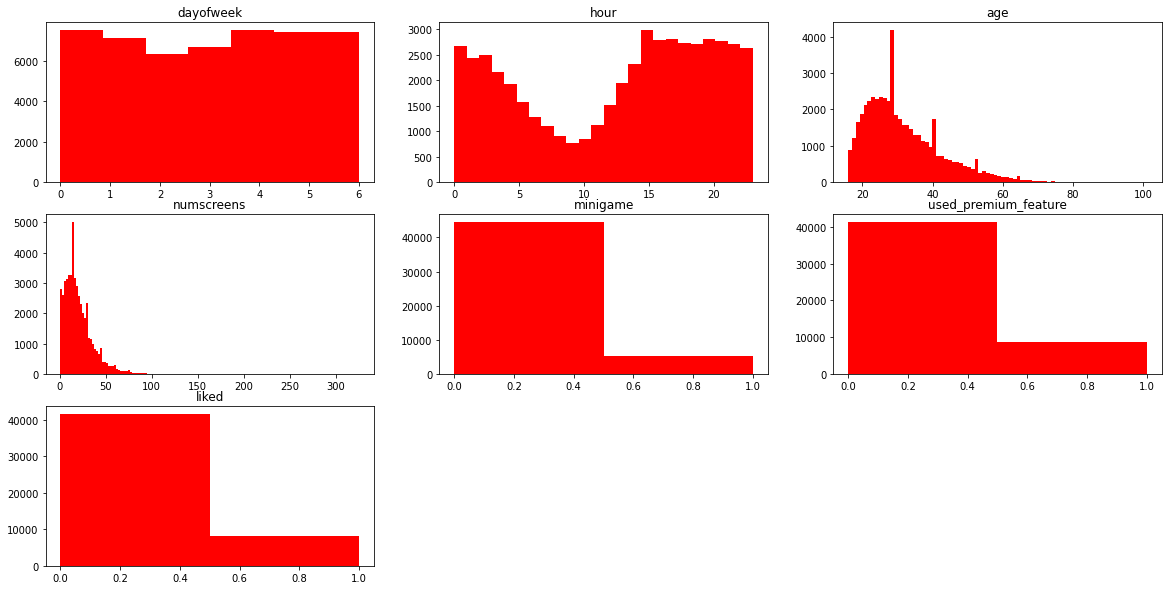

In [8]:
plt.suptitle('Histogram of Numerical Column')
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
for i in range(1,data.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data.columns.values[i-1])
    vals = np.size((data.iloc[:,i-1]).unique())
    plt.hist(data.iloc[:,i-1], bins=vals,color='red')

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

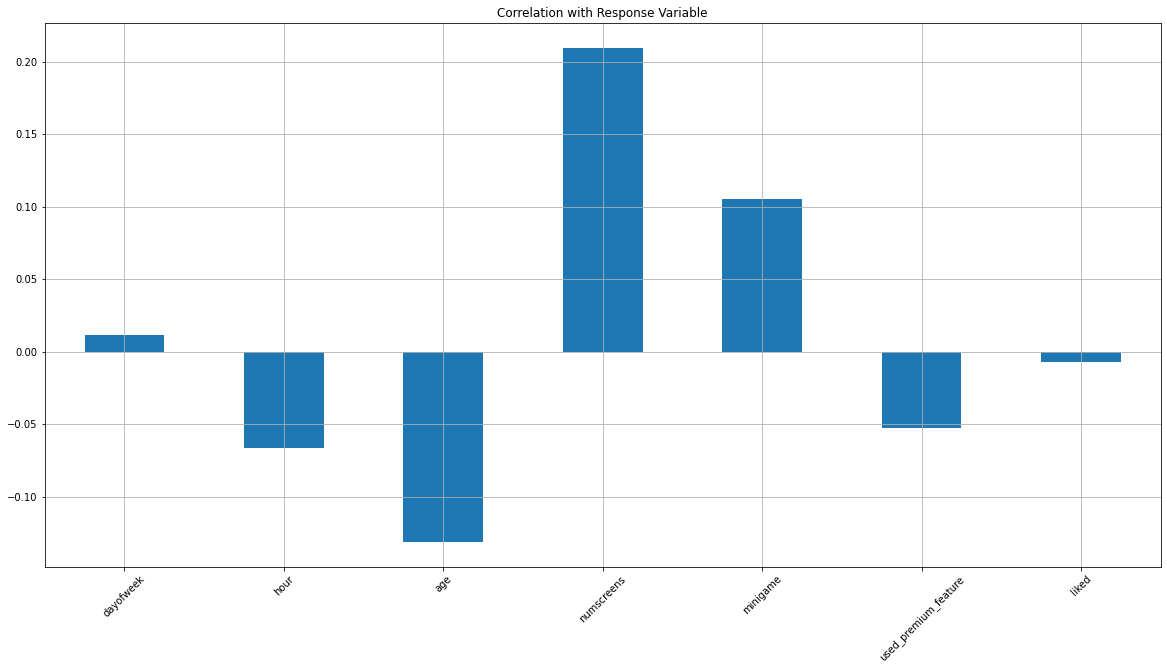

In [9]:
data.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                         rot = 45, grid = True,
                                         title = 'Correlation with Response Variable')

In [10]:
sns.set(style="white", font_scale = 2)
corr = data.corr()

In [11]:
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

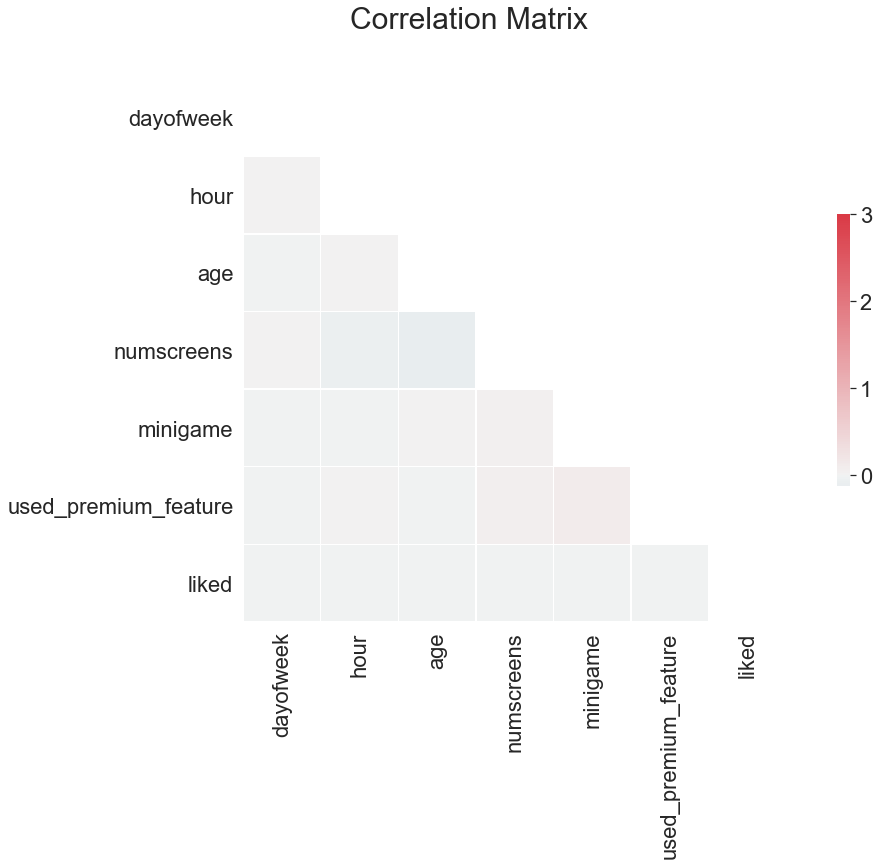

In [12]:
f, ax = plt.subplots(figsize = (18,10))
f.suptitle("Correlation Matrix", fontsize = 30)
cmap = sns.diverging_palette(220, 10, as_cmap= True )
sns.heatmap(corr, mask = mask, cmap = cmap, vmax=3, center=0, linewidth = 0.5,square= True, cbar_kws={'shrink' : .5})

### Feature Engineering 
* We want to analyse the time taken by customers to enroll 

In [13]:
dataset['first_open'] = [parser.parse(row_data ) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data ) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

In [14]:
dataset['difference'] =  (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

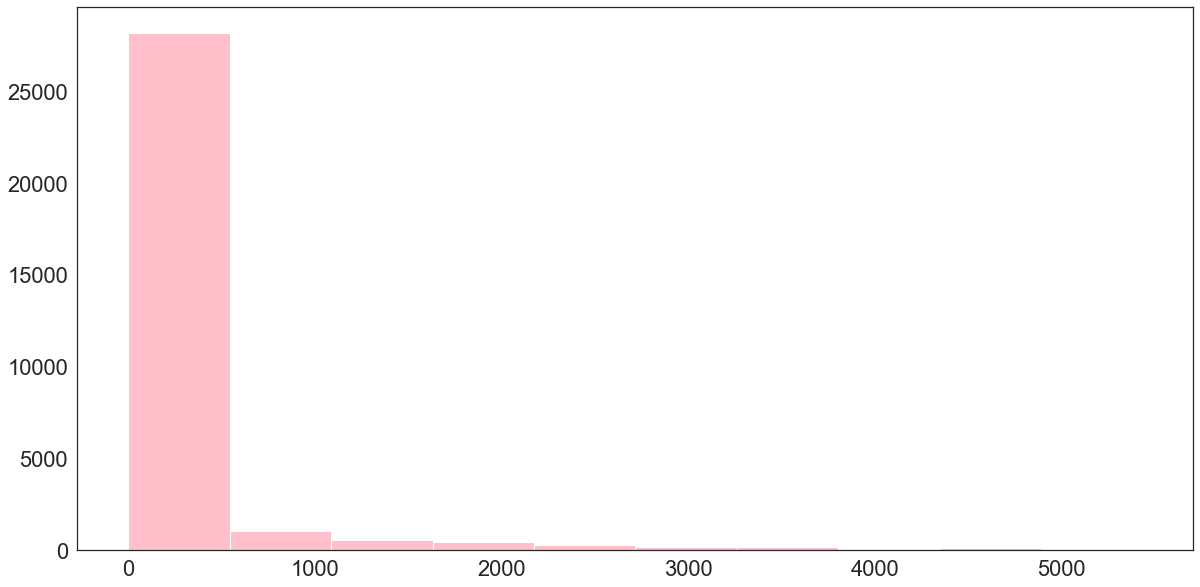

In [15]:
figure(figsize=(20, 10))
plt.hist(dataset['difference'].dropna(),color='pink')
plt.show()

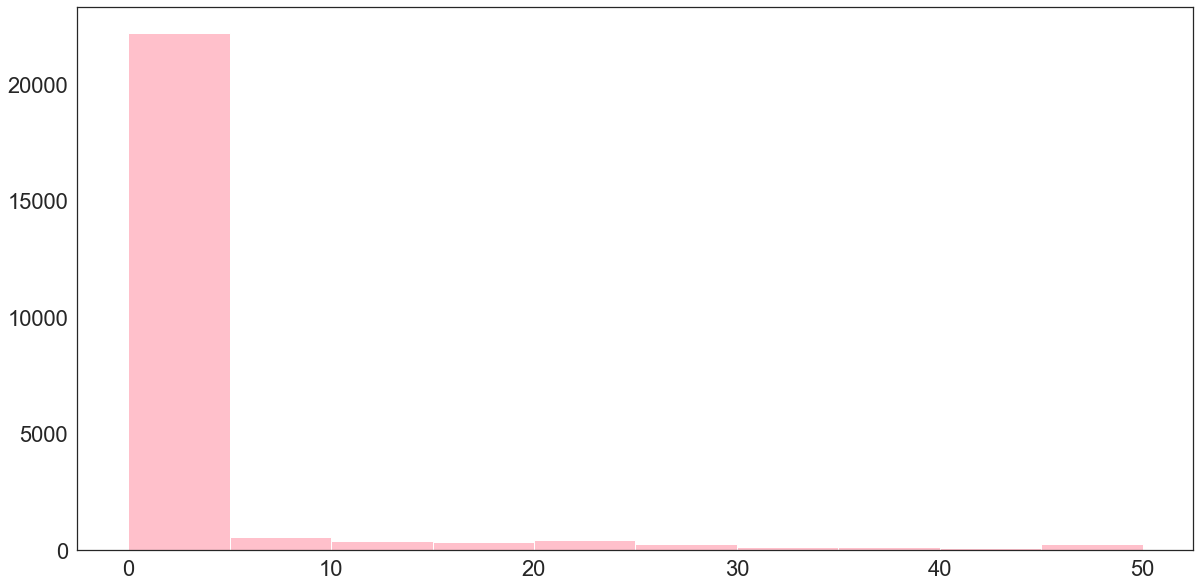

In [16]:
figure(figsize=(20, 10))
plt.hist(dataset['difference'].dropna(),color='pink',range=[0,50])
plt.show()

In [17]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['difference','first_open','enrolled_date'])

In [18]:
top_screens = pd.read_csv('Customer/top_screens.csv').top_screens.values

In [19]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [20]:
for sc in top_screens:
    dataset[sc] = dataset['screen_list'].str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')

In [25]:
dataset['Remaining_screen'] = dataset.screen_list.str.count(',')
dataset = dataset.drop(columns=['screen_list'])

In [26]:
# Funnel - to merge all columns to one column which belong to same category
saving_screen = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
dataset['Saving'] = dataset[saving_screen].sum(axis = 1)
dataset = dataset.drop(columns=saving_screen)

In [23]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [27]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Remaining_screen,Saving,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [28]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Remaining_screen',
       'Saving', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [29]:
dataset.to_csv('Customer/updated_appdata10.csv',index=False)

## Model 

In [30]:
import time

In [34]:
model_data = pd.read_csv('Customer/updated_appdata10.csv')

#### Data preprocessing

* Lets separate response variable from independent features

In [35]:
response = model_data['enrolled'] 
model_data = model_data.drop(columns=['enrolled'])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data, response, test_size=0.2, random_state=0)


In [38]:
# No use of used id for model creation but after prediction we need to assign user_id
train_id = X_train['user']
X_train = X_train.drop(columns= 'user')

In [39]:
test_id = X_test['user']
X_test = X_test.drop(columns = 'user')

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = pd.DataFrame(sc.fit_transform(X_train))
X_test_s = pd.DataFrame(sc.transform(X_test))
X_train_s.columns = X_train.columns.values
X_test_s.columns = X_test.columns.values

In [44]:
X_train_s.index = X_train.index.values
X_test_s.index = X_test.index.values

In [45]:
X_train = X_train_s
X_test = X_test_s

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.768
0.7617422721798475
0.7700892857142857
0.7658930373360243


<AxesSubplot:>

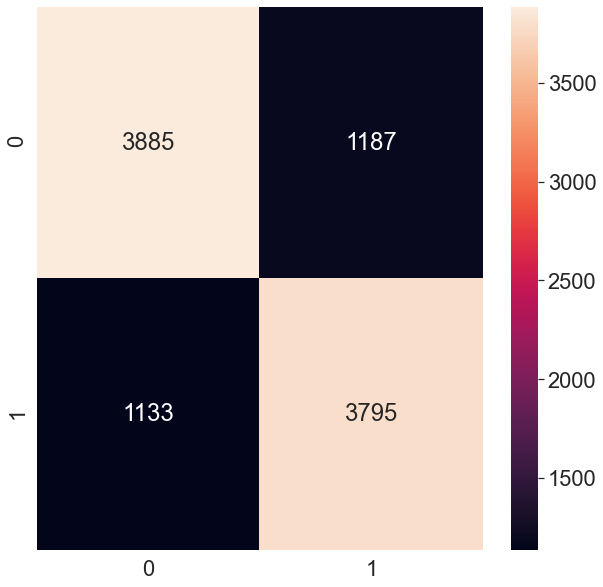

In [56]:
df_cm = pd.DataFrame(cm, index= (0,1), columns= (0,1))
plt.figure(figsize=(10,10))
sns.heatmap(df_cm,annot = True, fmt = 'g')


In [57]:
# K fold cross validation i.e., validation on subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(' Logistic accuracy : %0.3f(+/- %0.3f)' % (accuracies.mean(), accuracies.std()*2))

 Logistic accuracy : 0.767(+/- 0.009)


In [59]:
# Format the final result
final_result = pd.concat([y_test, test_id],axis=1).dropna()
final_result['predicted'] = y_pred
final_result[['user', 'enrolled', 'predicted']].reset_index(drop= True)

,user,enrolled,predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
